# Bootcamp test
Happiness is a very important aspect of our society. As individuals, we try to pursue happiness all our lives. But in a broader view, a happy society also seems to correlate with a higher engagement with the Sustainable Development Goals. As you can read in the World Happiness Report 2020: “As countries become richer the well-being of their citizens stagnates unless further economic growth is more sustainable by, for example, addressing inequality and improving environmental quality.”

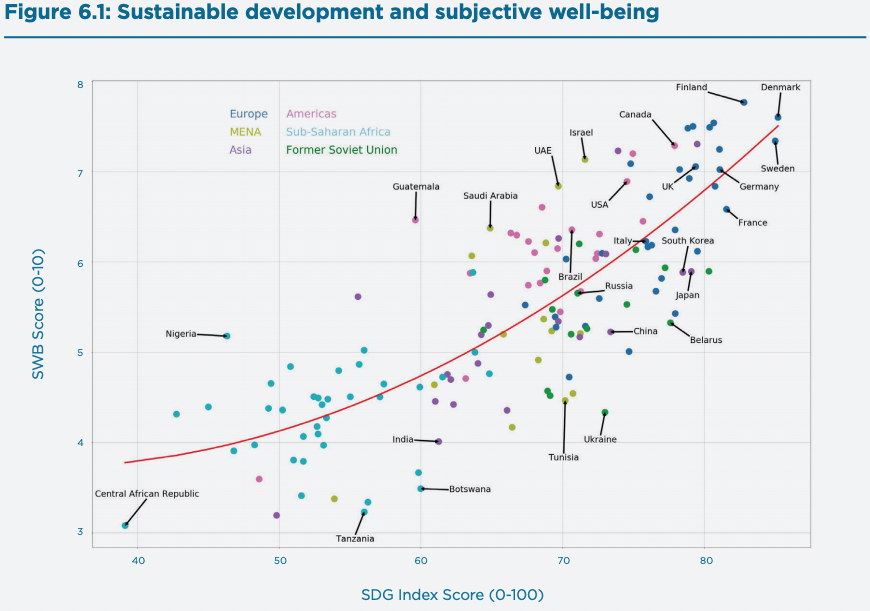

For this test, you will be using data from the World Happiness Report 2015 and 2019 from Kaggle: https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv 

**Tip:** If things get hard, don’t hesitate to ask google for help. Here is a little secret: Programming is basically 10% skill and 90% knowing how to google your way out of problems. But don’t tell anyone that. ;)

When finished send your notebook to education@fruitpunch.ai

Save your notebook as **BC_test_[first-name]_[last-name].ipynb**

Let’s dive into the data! 

#### 1. Load the 2 datasets 


In [5]:
#!pip install fsspec
import pandas as pd
data2015 = pd.read_csv("data/2015.csv")
display(data2015.head())
print(data2015.shape)

data2019 = pd.read_csv("data/2019.csv")
display(data2019.head())
print(data2019.shape)

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

(158, 12)


Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

(156, 9)


#### 2. Remove 'Dystopia residual' from 2015 dataset 

In [6]:
data2015.drop('Dystopia Residual', axis=1, inplace=True)
data2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')

#### 3. Add column ‘Year’ to both 2015 and 2019 dataset 

In [7]:
data2015['Year']=2015
data2019['Year']=2019

#### 4. Create a new column Region and assign the regions from the 2015 dataset to the right countries in the 2019 dataset 

In [8]:
print('Countries which do not appear in 2015 dataset:')
check_countries = data2019.merge(data2015[['Country','Region']], left_on = 'Country or region', right_on = 'Country', how = 'left')
display(check_countries[check_countries.Region.isnull()])

print('For those countries which do not appear in year 2015, the most similar country is searched using SequenceMatcher criteria :')
from difflib import SequenceMatcher
for country_region in check_countries[check_countries.Region.isnull()]['Country or region']:
    for country in list(set(data2015.Country)):
        if country_region.lower().split()[-1] in country.lower().strip().split():
            print(country_region,'-', country,' - Sq: ',SequenceMatcher(None, country_region, country).ratio())
            if SequenceMatcher(None, country_region, country).ratio() >0.6:
                data2019.loc[(data2019['Country or region']==country_region), 'Country or region'] = country
                #data2019.loc[(data2019['Country or region']==country_region), 'Region'] = data2015.loc[(data2015['Country']==country), 'Region'].values[0]
                
print('\nTherefore, the number of rows with missing Region values decreased to three:  ')
data2019 = data2019.merge(data2015[['Country','Region']], left_on = 'Country or region', right_on = 'Country', how = 'left')
display(data2019[data2019.Region.isnull()])
data2019.loc[data2019.Country.isnull(),'Country'] = data2019.loc[data2019.Country.isnull(),'Country or region']

Countries which do not appear in 2015 dataset:


Overall rank  Country or region  Score  GDP per capita  Social support  \
38             39  Trinidad & Tobago  6.192           1.231           1.477   
63             64    Northern Cyprus  5.718           1.263           1.252   
83             84    North Macedonia  5.274           0.983           1.294   
111           112            Somalia  4.668           0.000           0.698   
112           113            Namibia  4.639           0.879           1.313   
119           120             Gambia  4.516           0.308           0.939   
155           156        South Sudan  2.853           0.306           0.575   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
38                     0.713                         0.489       0.185   
63                     1.042                         0.417       0.191   
83                     0.838                         0.345       0.185   
111                    0.268                         0.559       0.243   
112                    0.477                         0.401       0.070   
119                    0.428                         0.382       0.269   
155                    0.295                         0.010       0.202   

     Perceptions of corruption  Year Country Region  
38                       0.016  2019     NaN    NaN  
63                       0.162  2019     NaN    NaN  
83                       0.034  2019     NaN    NaN  
111                      0.270  2019     NaN    NaN  
112                      0.056  2019     NaN    NaN  
119                      0.167  2019     NaN    NaN  
155                      0.091  2019     NaN    NaN

For those countries which do not appear in year 2015, the most similar country is searched using SequenceMatcher criteria :
Trinidad & Tobago - Trinidad and Tobago  - Sq:  0.8888888888888888
Northern Cyprus - North Cyprus  - Sq:  0.8888888888888888
Northern Cyprus - Cyprus  - Sq:  0.5714285714285714
North Macedonia - Macedonia  - Sq:  0.75
South Sudan - Sudan  - Sq:  0.625

Therefore, the number of rows with missing Region values decreased to three:  


Overall rank Country or region  Score  GDP per capita  Social support  \
111           112           Somalia  4.668           0.000           0.698   
112           113           Namibia  4.639           0.879           1.313   
119           120            Gambia  4.516           0.308           0.939   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
111                    0.268                         0.559       0.243   
112                    0.477                         0.401       0.070   
119                    0.428                         0.382       0.269   

     Perceptions of corruption  Year Country Region  
111                      0.270  2019     NaN    NaN  
112                      0.056  2019     NaN    NaN  
119                      0.167  2019     NaN    NaN

#### 5. Merge the 2 datasets to form a new one with the same number of columns as 2015 

First of all, it is necessary to check if columns of 2015 dataset are contained in the set of columns of year 2019.

In [9]:
print(set(data2015.columns) - set(data2019.columns))
print(data2015.columns)
data2019.columns

{'Happiness Rank', 'Standard Error', 'Happiness Score', 'Trust (Government Corruption)', 'Health (Life Expectancy)', 'Family', 'Freedom', 'Economy (GDP per Capita)'}
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Year'],
      dtype='object')


Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year', 'Country', 'Region'],
      dtype='object')

The column "Economy (GDP per Capita)" seems to be "GDP per capita" in 2019, whereas "Family" is only in 2015 dataset, thus this column will be Nan for 2019 data. Similarly, the columns "Happiness Rank" and "Standard Error" are only in 2015 dataset. Regarding to "Freedom", "Happiness Score", "Health (Life Expectancy)" and "Trust (Government Corruption)", those columns appear in 2019 dataset with the names "Freedom to make life choices", "Score", "Healthy life expectancy" and "Perceptions of corruption", respectively. Thus, a columns name changing is done before merge both datasets.

In [10]:
data2019.rename(columns={'GDP per capita':'Economy (GDP per Capita)', 
                         'Freedom to make life choices':'Freedom',
                         'Score':'Happiness Score',
                         'Healthy life expectancy':'Health (Life Expectancy)',
                         'Perceptions of corruption':'Trust (Government Corruption)'},inplace=True)
merged = data2015.append(data2019[['Country', 'Region', 'Happiness Score',
                                   'Economy (GDP per Capita)', 'Health (Life Expectancy)', 
                                   'Freedom', 'Trust (Government Corruption)',
                                   'Generosity', 'Year']])
merged

Country              Region  Happiness Rank  \
0                 Switzerland      Western Europe             1.0   
1                     Iceland      Western Europe             2.0   
2                     Denmark      Western Europe             3.0   
3                      Norway      Western Europe             4.0   
4                      Canada       North America             5.0   
..                        ...                 ...             ...   
151                    Rwanda  Sub-Saharan Africa             NaN   
152                  Tanzania  Sub-Saharan Africa             NaN   
153               Afghanistan       Southern Asia             NaN   
154  Central African Republic  Sub-Saharan Africa             NaN   
155                     Sudan  Sub-Saharan Africa             NaN   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
151            3.334             NaN                   0.35900      NaN   
152            3.231             NaN                   0.47600      NaN   
153            3.203             NaN                   0.35000      NaN   
154            3.083             NaN                   0.02600      NaN   
155            2.853             NaN                   0.30600      NaN   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
151                   0.61400  0.55500                        0.41100   
152                   0.49900  0.41700                        0.14700   
153                   0.36100  0.00000                        0.02500   
154                   0.10500  0.22500                        0.03500   
155                   0.29500  0.01000                        0.09100   

     Generosity  Year  
0       0.29678  2015  
1       0.43630  2015  
2       0.34139  2015  
3       0.34699  2015  
4       0.45811  2015  
..          ...   ...  
151     0.21700  2019  
152     0.27600  2019  
153     0.15800  2019  
154     0.23500  2019  
155     0.20200  2019  

[314 rows x 12 columns]

#### 6. List the countries that participated in 2015 but not 2019 

In [12]:
set(merged[merged['Year'] == 2015].Country) - set(merged[merged['Year'] == 2019].Country)

{'Angola', 'Djibouti', 'Oman', 'Somaliland region', 'Suriname'}

#### 7. Plot a bar chart for the countries' generosity for each year

It should look something like this:

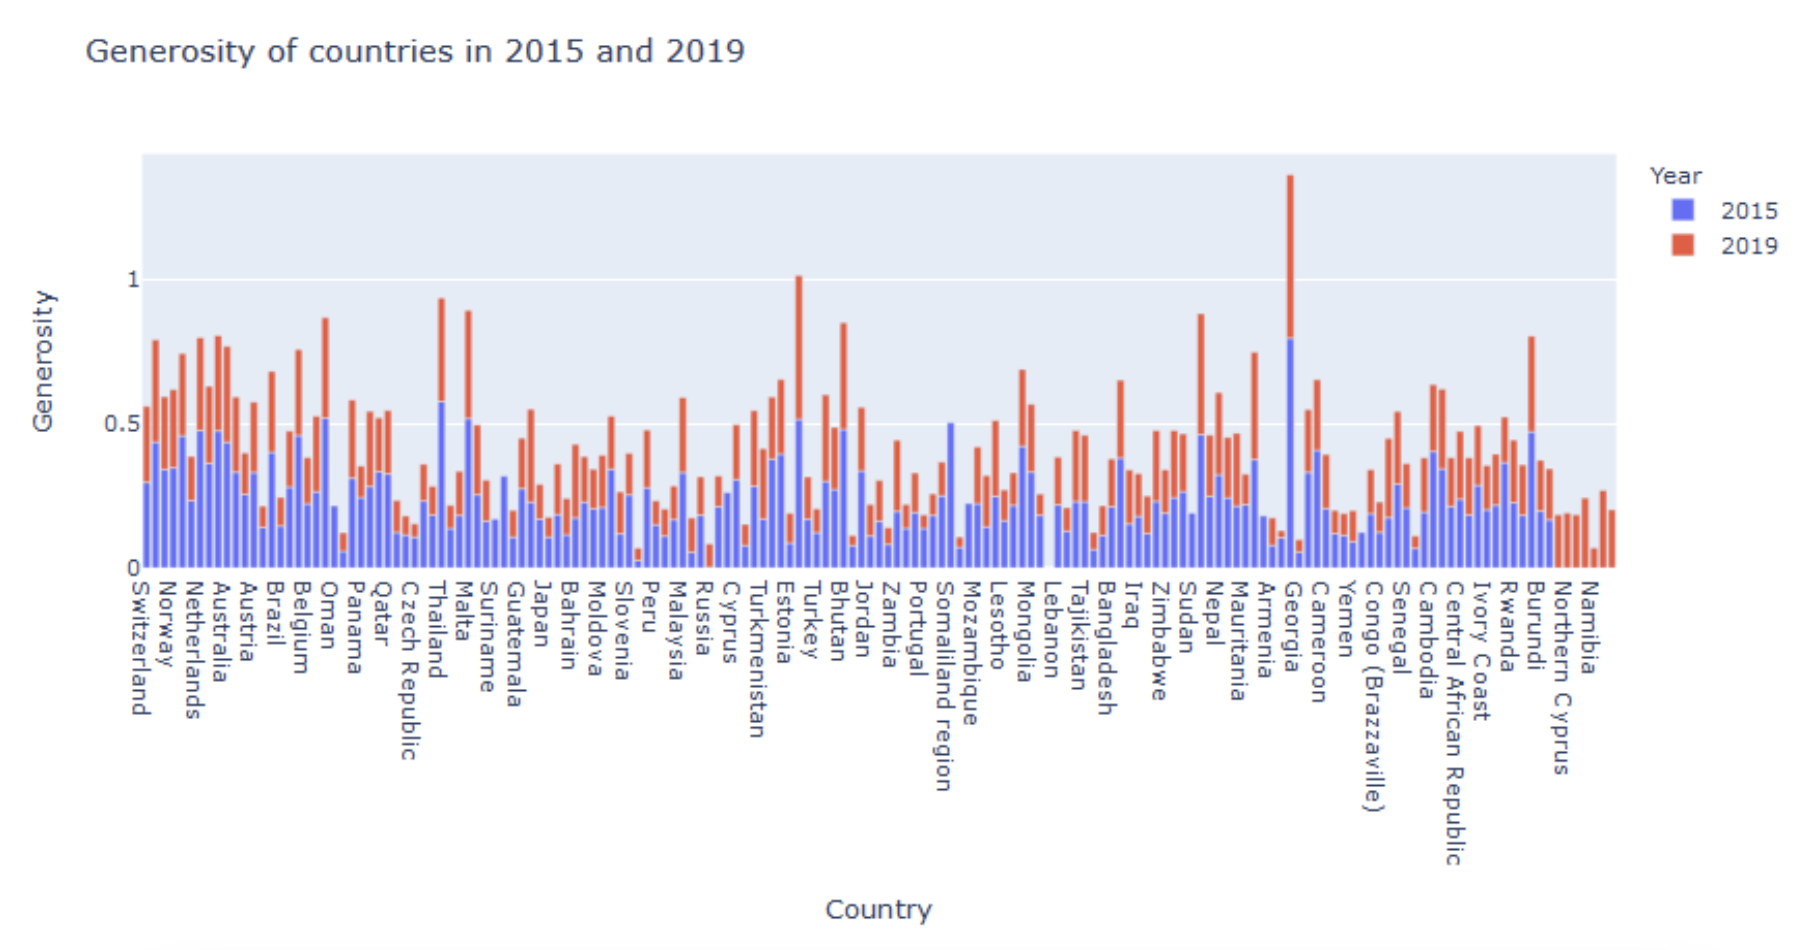

In [26]:
import plotly.express as px
import matplotlib.pyplot as plt
merged.Year = merged.Year.astype('category')
fig = px.bar(merged, x="Country", y="Generosity", color="Year", title="Generosity of countries in 2015 and 2019")
fig.show()

#### 8. Bubble chart of Freedom Vs Trust where the size of the bubble is the GDP per Capita for 2019 


In [48]:
fig = px.scatter(merged.query("Year==2019"), x="Trust (Government Corruption)", y="Freedom", 
                 size="Economy (GDP per Capita)", hover_name="Country", 
                 log_x=True, size_max=20, title = 'Freedom Vs Trust and GDP per Capita in 2019')
fig.show()

#### 9. Bubble chart of Family Vs Health where the size is the happiness score of 2015 

In [47]:
fig = px.scatter(merged.query("Year==2015"), x="Health (Life Expectancy)", y="Family", 
                 size="Happiness Score", hover_name="Country", 
                 log_x=True, size_max=20, title = 'Family Vs Health and Hapiness Score in 2015')
fig.show()

#### 10. List the 3 variables that have the strongest correlation with the Happiness score (use Pearson Correlation) 

In [59]:
import numpy as np
pearson_c = merged.corr().sort_values('Happiness Score', ascending = False)[['Happiness Score']]
pearson_c['Absolute'] = np.abs(pearson_c['Happiness Score'])
pearson_c.sort_values('Absolute', ascending=False).drop('Happiness Score').head(3)

Happiness Score  Absolute
Happiness Rank                  -0.992105  0.992105
Economy (GDP per Capita)         0.786038  0.786038
Family                           0.740605  0.740605

Finally, the 3 variables that have the strongest lineal correlation with the Happiness score are:
* Happiness Rank : negative correlation
* Economy (GDP per Capita): positive correlation	
* Family: positive correlation